In [1]:
import requests
import json
import sys
import os
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as st

import pprint

In [2]:
states_covid = ("..//project1 covid19//1_covid_tracking_project_testing_numbers_and_covid_deaths_by_state.csv")
states_covid = pd.read_csv(states_covid)
# data_file = "../project1/1_covid_tracking_project_testing_numbers_and_covid_deaths_by_state.csv"
states_covid.head()



,state,total_population,total_test_results,total_test_encounters,total_test_specimens,total_people_tested,positive,negative,positivity_rate,test_results_per_1000,deaths,deaths_per_100_000,last_update_et
0,Alaska,737438,1352480,NaN,1352480.0,NaN,48624,1303856,3.595173,1834.025369,224,30.375435,2021-01-10 03:59:00 EDT
1,Alabama,4887871,1966656,NaN,NaN,1966656.0,401900,1645371,20.435704,402.354317,5334,109.127266,2021-01-10 11:00:00 EDT
2,Arkansas,3013825,2158016,NaN,2158016.0,NaN,251746,1953123,11.665622,716.038921,4010,133.053512,2021-01-10 00:00:00 EDT
3,Arizona,7171646,5635119,NaN,5635119.0,3075262.0,618546,2490171,10.976627,785.749743,10141,141.404079,2021-01-10 00:00:00 EDT
4,California,39557045,35826824,NaN,35826824.0,NaN,2670962,33155862,7.455202,905.700211,29701,75.083971,2021-01-10 02:59:00 EDT


In [3]:
states_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   total_population       51 non-null     int64  
 2   total_test_results     51 non-null     int64  
 3   total_test_encounters  13 non-null     float64
 4   total_test_specimens   39 non-null     float64
 5   total_people_tested    26 non-null     float64
 6   positive               51 non-null     int64  
 7   negative               51 non-null     int64  
 8   positivity_rate        51 non-null     float64
 9   test_results_per_1000  51 non-null     float64
 10  deaths                 51 non-null     int64  
 11  deaths_per_100_000     51 non-null     float64
 12  last_update_et         50 non-null     object 
dtypes: float64(6), int64(5), object(2)
memory usage: 5.3+ KB


In [4]:
states_covid.describe()

,total_population,total_test_results,total_test_encounters,total_test_specimens,total_people_tested,positive,negative,positivity_rate,test_results_per_1000,deaths,deaths_per_100_000
count,5.100000e+01,5.100000e+01,1.300000e+01,3.900000e+01,2.600000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000
mean,6.415048e+06,5.246483e+06,5.946888e+06,5.388758e+06,1.873788e+06,4.320025e+05,4.021122e+06,9.592460,867.968673,7133.666667,108.019759
std,7.343308e+06,6.613454e+06,7.676098e+06,6.416277e+06,1.934892e+06,4.917569e+05,6.050745e+06,5.809241,375.977207,8009.607722,46.925864
min,5.777370e+05,3.841610e+05,8.695720e+05,5.281370e+05,2.015730e+05,8.967000e+03,1.616910e+05,1.181281,319.977449,156.000000,21.753042
25%,1.780020e+06,1.315516e+06,1.278553e+06,1.352180e+06,5.371728e+05,1.145005e+05,9.365485e+05,6.143951,644.169822,1583.500000,78.720170
50%,4.468402e+06,3.310799e+06,4.034774e+06,3.310799e+06,1.219871e+06,3.059990e+05,2.188871e+06,8.625419,804.822560,5167.000000,104.094354
75%,7.353618e+06,5.810174e+06,5.608884e+06,6.821794e+06,2.869600e+06,5.631030e+05,4.179028e+06,11.132184,981.953856,8429.000000,136.509418
max,3.955704e+07,3.582682e+07,2.732100e+07,3.582682e+07,9.194748e+06,2.670962e+06,3.315586e+07,26.894453,2001.264524,31672.000000,223.224509


In [5]:
print(states_covid.columns)


Index(['state', 'total_population', 'total_test_results',
       'total_test_encounters', 'total_test_specimens', 'total_people_tested',
       'positive', 'negative', 'positivity_rate', 'test_results_per_1000',
       'deaths', 'deaths_per_100_000', 'last_update_et'],
      dtype='object')


In [6]:
states_covid = states_covid.drop(
    ["total_test_encounters", "total_test_specimens", "total_people_tested", "test_results_per_1000", "deaths_per_100_000","positivity_rate"],
    axis=1
)
states_covid


,state,total_population,total_test_results,positive,negative,deaths,last_update_et
0,Alaska,737438,1352480,48624,1303856,224,2021-01-10 03:59:00 EDT
1,Alabama,4887871,1966656,401900,1645371,5334,2021-01-10 11:00:00 EDT
2,Arkansas,3013825,2158016,251746,1953123,4010,2021-01-10 00:00:00 EDT
3,Arizona,7171646,5635119,618546,2490171,10141,2021-01-10 00:00:00 EDT
4,California,39557045,35826824,2670962,33155862,29701,2021-01-10 02:59:00 EDT
5,Colorado,5695564,4770751,361148,1894821,5208,2021-01-10 01:59:00 EDT
6,Connecticut,3572665,4619970,205994,4413976,6324,2021-01-07 20:30:00 EDT
7,District of Columbia,702455,957350,31791,925559,817,2021-01-09 00:00:00 EDT
8,Delaware,967171,1052875,65273,470285,972,2021-01-09 18:00:00 EDT
9,Florida,21299325,16817965,1450620,7744128,23261,2021-01-09 23:59:00 EDT


In [8]:
# percentage of positive cases per state
states_covid["positive_cases_percentage"] = (states_covid["positive"] / states_covid["total_test_results"]) * 100
states_covid.head()

,state,total_population,total_test_results,positive,negative,deaths,last_update_et,positive_cases_percentage
0,Alaska,737438,1352480,48624,1303856,224,2021-01-10 03:59:00 EDT,3.595173
1,Alabama,4887871,1966656,401900,1645371,5334,2021-01-10 11:00:00 EDT,20.435704
2,Arkansas,3013825,2158016,251746,1953123,4010,2021-01-10 00:00:00 EDT,11.665622
3,Arizona,7171646,5635119,618546,2490171,10141,2021-01-10 00:00:00 EDT,10.976627
4,California,39557045,35826824,2670962,33155862,29701,2021-01-10 02:59:00 EDT,7.455202


In [9]:
# percentage of negative cases per state
states_covid["negative_cases_percentage"] = (states_covid["negative"] / states_covid["total_test_results"]) * 100
# states_covid["negative_cases_percentage"] = states_covid["negative_cases_percentage"].map("{:.2f}".format)
states_covid.head()

,state,total_population,total_test_results,positive,negative,deaths,last_update_et,positive_cases_percentage,negative_cases_percentage
0,Alaska,737438,1352480,48624,1303856,224,2021-01-10 03:59:00 EDT,3.595173,96.404827
1,Alabama,4887871,1966656,401900,1645371,5334,2021-01-10 11:00:00 EDT,20.435704,83.663386
2,Arkansas,3013825,2158016,251746,1953123,4010,2021-01-10 00:00:00 EDT,11.665622,90.505492
3,Arizona,7171646,5635119,618546,2490171,10141,2021-01-10 00:00:00 EDT,10.976627,44.190211
4,California,39557045,35826824,2670962,33155862,29701,2021-01-10 02:59:00 EDT,7.455202,92.544798


In [10]:
print(states_covid["positive_cases_percentage"].dtype)  # Should show float64 or int64
print(states_covid["negative_cases_percentage"].dtype)  # Should show float64 or int64
print(states_covid["positive_cases_percentage"].unique())  # Check for unexpected values
print(states_covid["negative_cases_percentage"].unique())  # Check for unexpected values


float64
float64
[ 3.59517331 20.43570406 11.6656225  10.97662711  7.45520172  7.57004505
  4.45877354  3.3207291   6.19950137  8.62541931 11.21897858  2.74468359
 20.92588528 26.58705486  7.29439778  9.22636902 23.05178714  9.170747
  7.8010643   3.69360279  4.99042756  2.49639574  6.60659091  7.69915704
 11.08431634 16.80528025 10.24921342  8.24829432  7.40806208  9.5027891
  4.7265386   7.09182344  7.4588682  11.18005215  4.12298934  9.53962924
 11.70361935  4.51022456 17.57111108  4.61320994 10.22692362 26.89445311
 10.99298107 13.21344186 12.88960648  8.6931732   1.1812813   6.73135596
  9.81050776  6.08840129  8.86739615]
[96.40482669 83.66338597 90.50549208 44.19021142 92.54479828 39.71745748
 95.54122646 96.6792709  44.66674582 46.04676012 88.78102142 33.94233025
 79.07411472 78.13389108 92.70560222 35.82936947 76.94821286 92.74081574
 92.1989357  32.391189   42.89601147 97.50360426 93.39340909 46.96018102
 44.28793505 83.19471975 89.75078658 91.75170568 22.50653669 37.52595248


In [11]:
# immune states are those with less than 10% positive cases or more than 90% negative cases

immune_states = states_covid.loc[
    (states_covid["positive_cases_percentage"] < 10) | 
    (states_covid["negative_cases_percentage"] > 90)
]
immune_states


,state,total_population,total_test_results,positive,negative,deaths,last_update_et,positive_cases_percentage,negative_cases_percentage
0,Alaska,737438,1352480,48624,1303856,224,2021-01-10 03:59:00 EDT,3.595173,96.404827
2,Arkansas,3013825,2158016,251746,1953123,4010,2021-01-10 00:00:00 EDT,11.665622,90.505492
4,California,39557045,35826824,2670962,33155862,29701,2021-01-10 02:59:00 EDT,7.455202,92.544798
5,Colorado,5695564,4770751,361148,1894821,5208,2021-01-10 01:59:00 EDT,7.570045,39.717457
6,Connecticut,3572665,4619970,205994,4413976,6324,2021-01-07 20:30:00 EDT,4.458774,95.541226
7,District of Columbia,702455,957350,31791,925559,817,2021-01-09 00:00:00 EDT,3.320729,96.679271
8,Delaware,967171,1052875,65273,470285,972,2021-01-09 18:00:00 EDT,6.199501,44.666746
9,Florida,21299325,16817965,1450620,7744128,23261,2021-01-09 23:59:00 EDT,8.625419,46.046760
11,Hawaii,1420491,869572,23867,295153,309,2021-01-08 14:30:00 EDT,2.744684,33.942330
14,Illinois,12741080,14103289,1028750,13074539,19293,2021-01-10 00:00:00 EDT,7.294398,92.705602


In [12]:
states_covid.style.background_gradient(cmap="cubehelix")


,state,total_population,total_test_results,positive,negative,deaths,last_update_et,positive_cases_percentage,negative_cases_percentage
0,Alaska,737438,1352480,48624,1303856,224,2021-01-10 03:59:00 EDT,3.595173,96.404827
1,Alabama,4887871,1966656,401900,1645371,5334,2021-01-10 11:00:00 EDT,20.435704,83.663386
2,Arkansas,3013825,2158016,251746,1953123,4010,2021-01-10 00:00:00 EDT,11.665622,90.505492
3,Arizona,7171646,5635119,618546,2490171,10141,2021-01-10 00:00:00 EDT,10.976627,44.190211
4,California,39557045,35826824,2670962,33155862,29701,2021-01-10 02:59:00 EDT,7.455202,92.544798
5,Colorado,5695564,4770751,361148,1894821,5208,2021-01-10 01:59:00 EDT,7.570045,39.717457
6,Connecticut,3572665,4619970,205994,4413976,6324,2021-01-07 20:30:00 EDT,4.458774,95.541226
7,District of Columbia,702455,957350,31791,925559,817,2021-01-09 00:00:00 EDT,3.320729,96.679271
8,Delaware,967171,1052875,65273,470285,972,2021-01-09 18:00:00 EDT,6.199501,44.666746
9,Florida,21299325,16817965,1450620,7744128,23261,2021-01-09 23:59:00 EDT,8.625419,46.046760


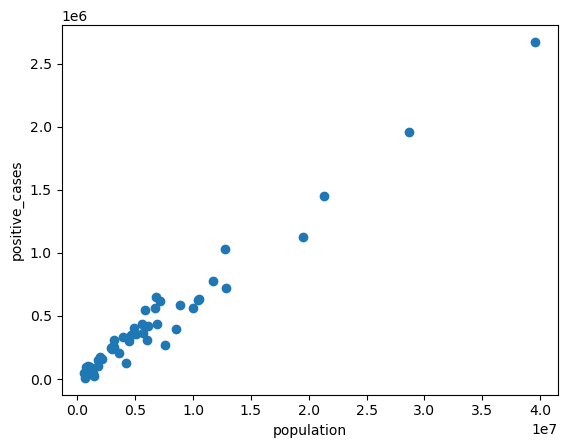

In [27]:
population= states_covid.groupby('state')['total_population'].sum()
positive_cases= states_covid.groupby('state')["positive"].sum()
plt.scatter(population, positive_cases)
plt.xlabel('population')
plt.ylabel('positive_cases')
plt.show()

The correlation between positive cases and the population is 0.98


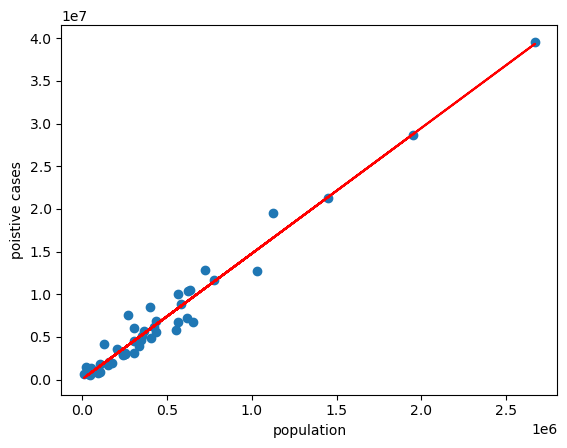

In [29]:
correlation=round(positive_cases.corr(population),2)
print(f"The correlation between positive cases and the population is {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(positive_cases, population)
regress_values = positive_cases * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(positive_cases,population)
plt.plot(positive_cases,regress_values,"r-")
plt.xlabel('population')
plt.ylabel('poistive cases')
plt.show()

The population and positive cases are strongly related to each other

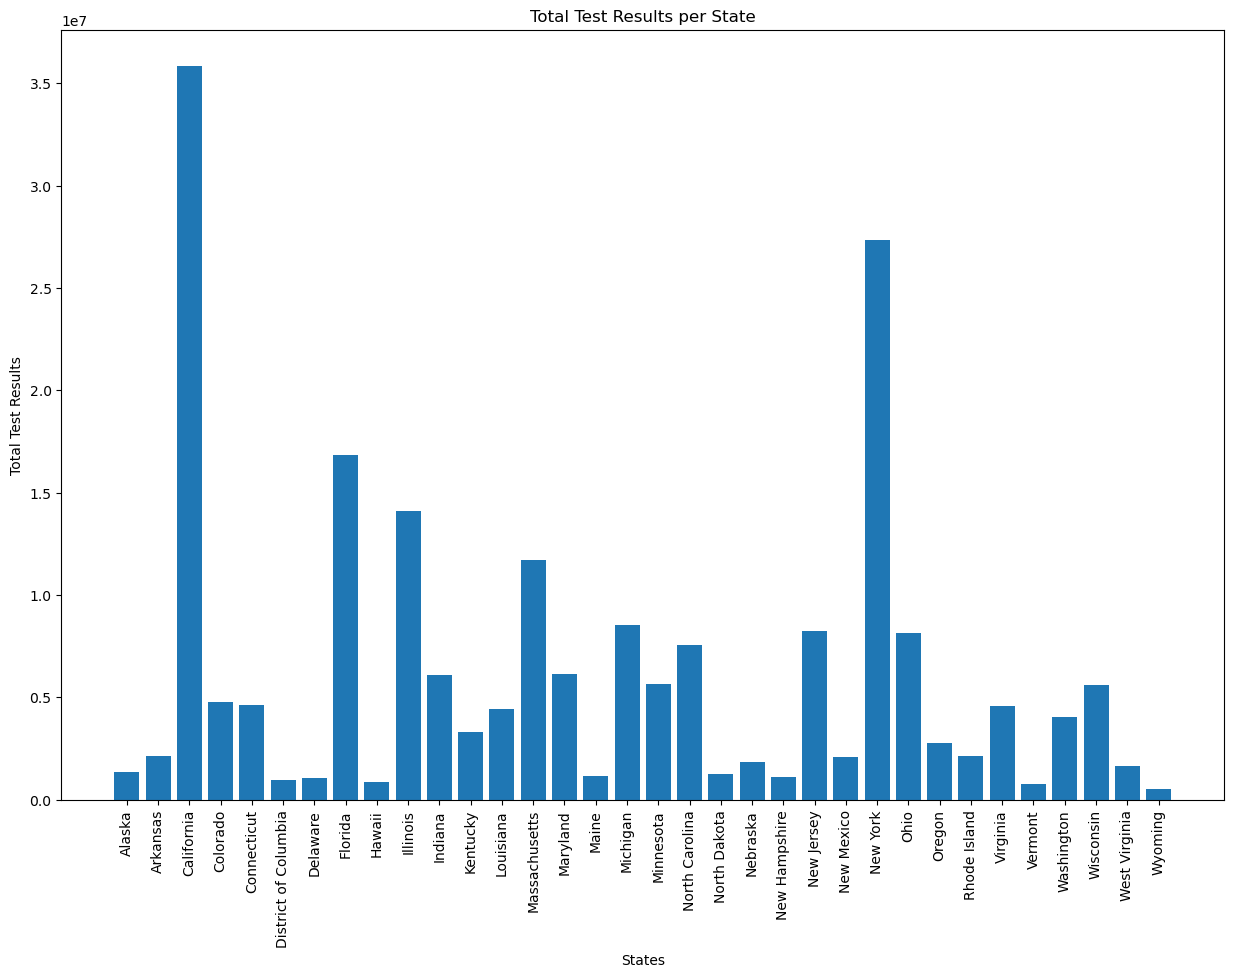

In [13]:
%matplotlib inline 
plt.figure(figsize=(15, 10))
plt.bar(immune_states["state"], immune_states["total_test_results"])
plt.xlabel("States")
plt.ylabel("Total Test Results")
plt.title("Total Test Results per State")
plt.xticks(rotation=90)
plt.show()

Maximum number of total test results are found in California state and New York that is large metropolitan area and Minimum number of total test results are found in Wyoming.


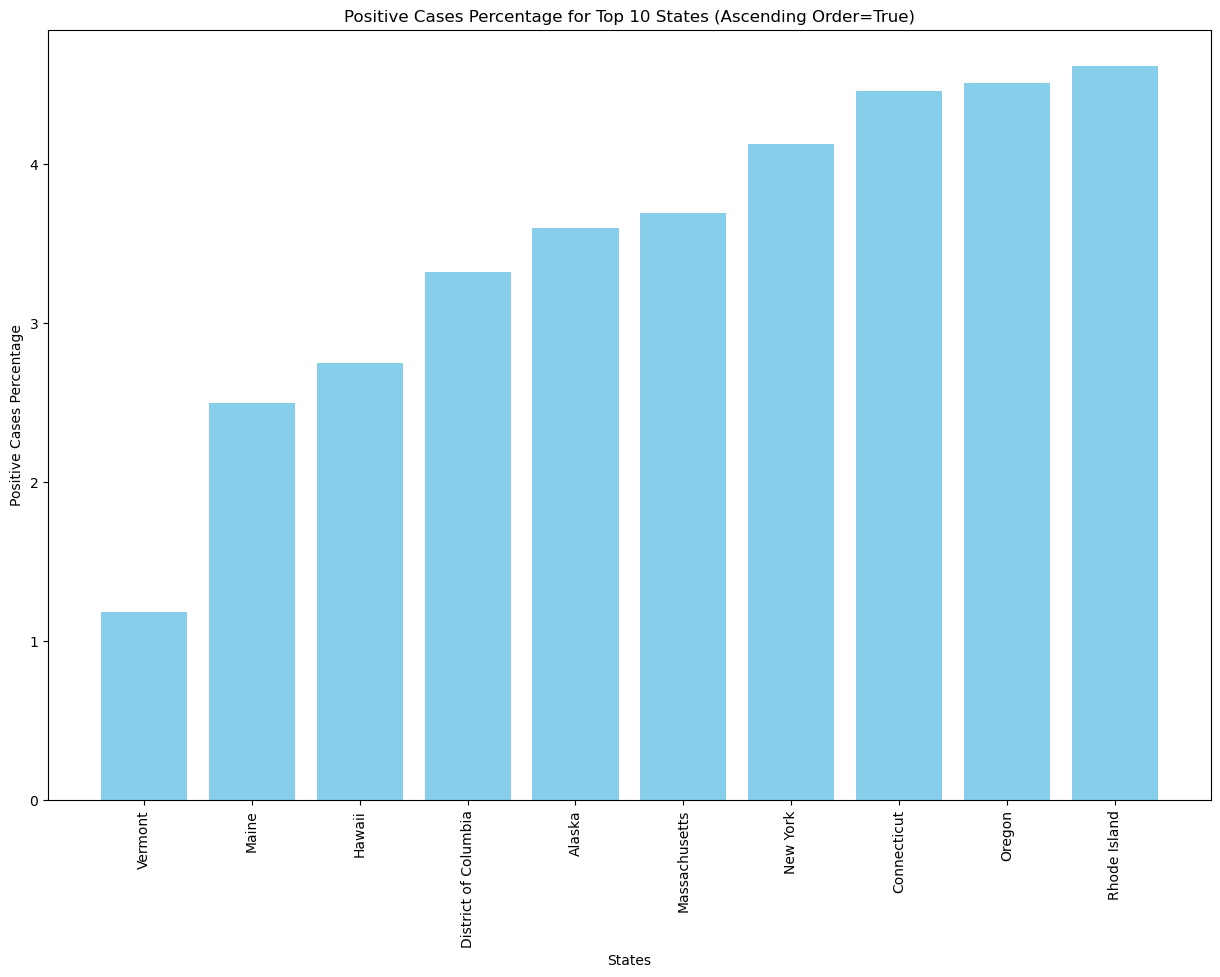

In [32]:
sorted_states = immune_states.sort_values(by="positive_cases_percentage").head(10)

# Plot the data for the top 10 states
plt.figure(figsize=(15, 10))
plt.bar(sorted_states["state"], sorted_states["positive_cases_percentage"], color="skyblue")
plt.xlabel("States")
plt.ylabel("Positive Cases Percentage")
plt.title("Positive Cases Percentage for Top 10 States (Ascending Order)")
plt.xticks(rotation=90)
plt.show()


Maximum percentage of positive cases in Arkansa and Minimum number of positive cases are in Vermont


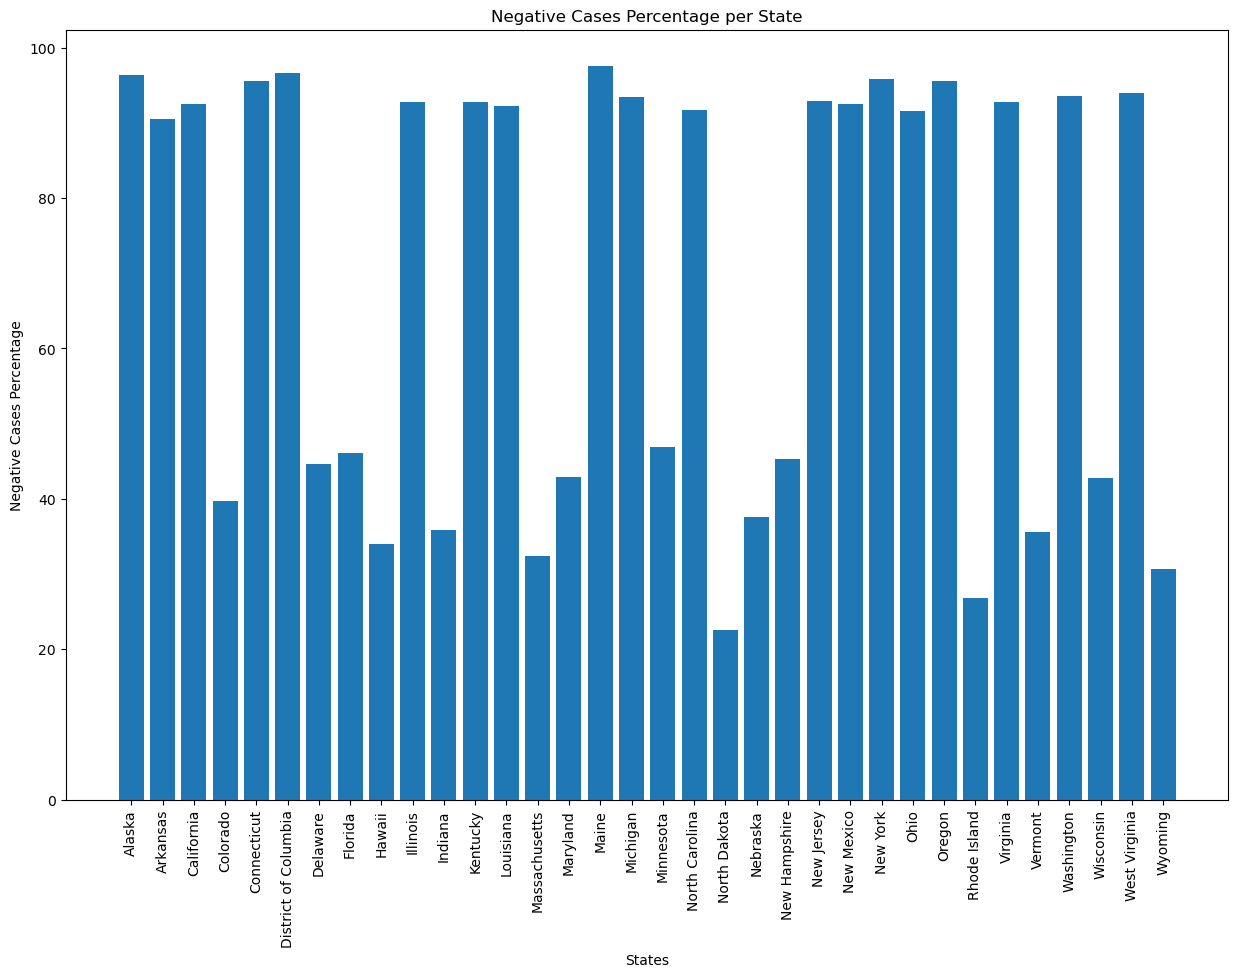

In [15]:
plt.figure(figsize=(15, 10))
plt.bar(immune_states["state"], immune_states["negative_cases_percentage"])
plt.xlabel("States")
plt.ylabel("Negative Cases Percentage")
plt.title("Negative Cases Percentage per State")
plt.xticks(rotation=90)
plt.show()

North Dakota has minimum percentage of negative cases that means this state is more prevalent to covid19


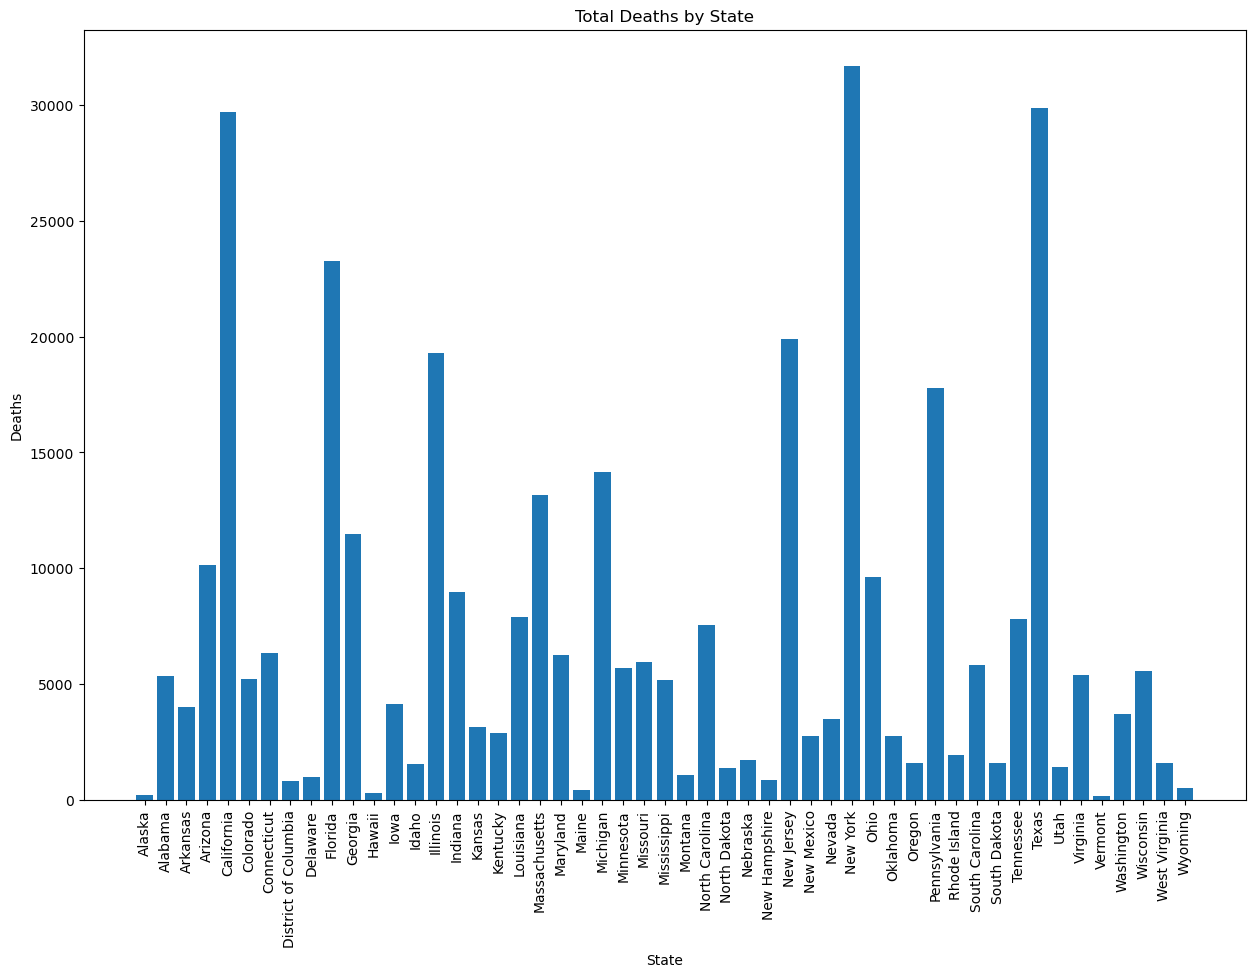

In [16]:
plt.figure(figsize=(15, 10))
plt.bar(states_covid["state"], states_covid["deaths"])
plt.xlabel("State")
plt.ylabel("Deaths")
plt.title("Total Deaths by State")
plt.xticks(rotation=90)
plt.show()


Maximum deaths occur in Newyork city and then California and Texas.Minimum deaths occur in Alaska and Vermont


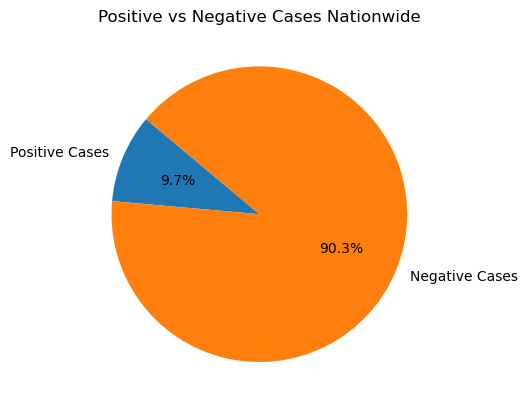

In [17]:
labels = ["Positive Cases", "Negative Cases"]
sizes = [states_covid["positive"].sum(), states_covid["negative"].sum()]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Positive vs Negative Cases Nationwide")
plt.show()


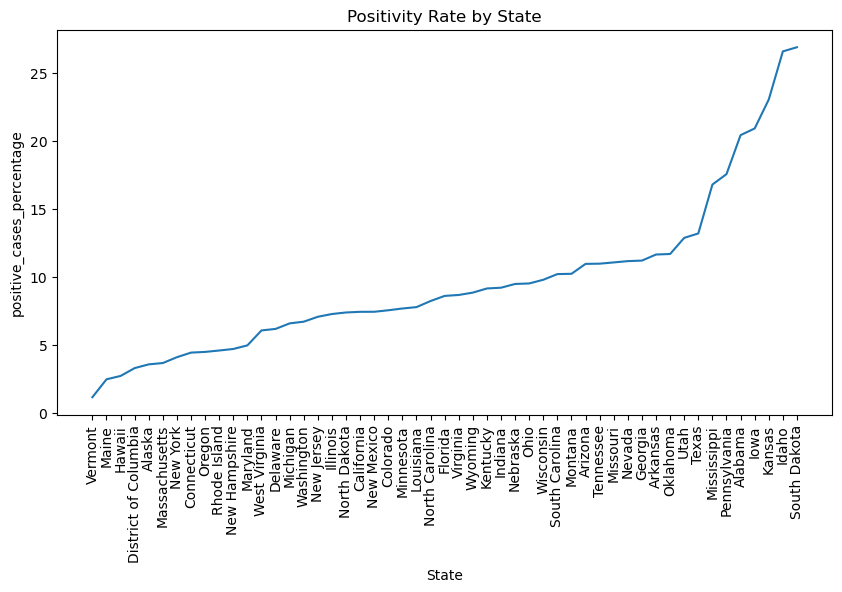

In [21]:
plt.figure(figsize=(10,5))
states_covid_sorted = states_covid.sort_values(by="positive_cases_percentage")
plt.plot(states_covid_sorted["state"], states_covid_sorted["positive_cases_percentage"])
plt.xlabel("State")
plt.ylabel("positive_cases_percentage")
plt.title("Positivity Rate by State")
plt.xticks(rotation=90)
plt.show()


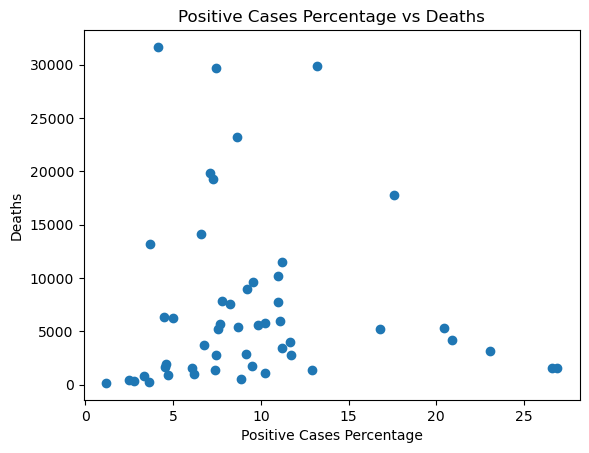

In [19]:
plt.scatter(states_covid["positive_cases_percentage"], states_covid["deaths"])
plt.xlabel("Positive Cases Percentage")
plt.ylabel("Deaths")
plt.title("Positive Cases Percentage vs Deaths")
plt.show()


According to age group

In [20]:
age_group = pd.read_csv("../project1 covid19/CDCcovid.csv")
age_group.head()

,FIPS,COUNTY,STATE,AGEGROUP,CASES
0,1001,Autauga,Alabama,0 - 17 years,489
1,1001,Autauga,Alabama,18 to 49 years,2062
2,1001,Autauga,Alabama,50 to 64 years,858
3,1001,Autauga,Alabama,65+ years,638
4,1003,Baldwin,Alabama,0 - 17 years,1185


In [21]:
age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5871 entries, 0 to 5870
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FIPS      5871 non-null   int64 
 1   COUNTY    5871 non-null   object
 2   STATE     5871 non-null   object
 3   AGEGROUP  5871 non-null   object
 4   CASES     5871 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 229.5+ KB


In [22]:
grouped_age_group = age_group.groupby(["AGEGROUP","STATE"])
grouped_age_group.count().head(100)
grouped_age_group.sum().head(100)


FIPS  \
AGEGROUP       STATE                 
0 - 17 years   Alabama       49092   
               Alaska        10512   
               Arizona       52185   
               Arkansas     172458   
               California   302932   
...                            ...   
18 to 49 years Wisconsin   2918957   
50 to 64 years Alabama       49092   
               Alaska        10512   
               Arizona       52185   
               Arkansas     172458   

                                                                      COUNTY  \
AGEGROUP       STATE                                                           
0 - 17 years   Alabama     AutaugaBaldwinBarbourBibbBlountCalhounChambers...   
               Alaska      AnchorageFairbanks North StarJuneauKenai Penin...   
               Arizona     ApacheCochiseCoconinoGilaGrahamMaricopaMohaveN...   
               Arkansas    BaxterBentonBooneCarrollClarkCleburneColumbiaC...   
               California  AlamedaAmadorButteCalaverasColusaContra CostaD...   
...                                                                      ...   
18 to 49 years Wisconsin   AdamsBarronBrownCalumetChippewaClarkColumbiaDa...   
50 to 64 years Alabama     AutaugaBaldwinBarbourBibbBlountCalhounChambers...   
               Alaska      AnchorageFairbanks North StarJuneauKenai Penin...   
               Arizona     ApacheCochiseCoconinoGilaGrahamMaricopaMohaveN...   
               Arkansas    BaxterBentonBooneCarrollClarkCleburneColumbiaC...   

                            CASES  
AGEGROUP       STATE               
0 - 17 years   Alabama      36053  
               Alaska        6612  
               Arizona     101006  
               Arkansas     29733  
               California  454561  
...                           ...  
18 to 49 years Wisconsin   244933  
50 to 64 years Alabama      62397  
               Alaska        8728  
               Arizona     159263  
               Arkansas     37820  

[100 rows x 3 columns]

In [23]:
sorted_age_group = age_group.sort_values("AGEGROUP", ascending=False)
sorted_age_group.head(100)

,FIPS,COUNTY,STATE,AGEGROUP,CASES
5870,55141,Wood,Wisconsin,65+ years,1092
1819,18141,St. Joseph,Indiana,65+ years,1047
1891,19019,Buchanan,Iowa,65+ years,282
1887,19017,Bremer,Iowa,65+ years,459
4621,44003,Kent,Rhode Island,65+ years,1305
...,...,...,...,...,...
4769,45079,Richland,South Carolina,65+ years,4512
1735,18077,Jefferson,Indiana,65+ years,226
4721,45051,Horry,South Carolina,65+ years,8036
1739,18079,Jennings,Indiana,65+ years,136


In [24]:
sorted_state_group = age_group.sort_values("STATE", ascending=True)
sorted_state_group 

,FIPS,COUNTY,STATE,AGEGROUP,CASES
0,1001,Autauga,Alabama,0 - 17 years,489
118,1089,Madison,Alabama,50 to 64 years,3833
119,1089,Madison,Alabama,65+ years,2782
120,1093,Marion,Alabama,0 - 17 years,153
121,1093,Marion,Alabama,18 to 49 years,743
...,...,...,...,...,...
5731,55055,Jefferson,Wisconsin,0 - 17 years,976
5732,55055,Jefferson,Wisconsin,18 to 49 years,3809
5733,55055,Jefferson,Wisconsin,50 to 64 years,1720
5735,55057,Juneau,Wisconsin,0 - 17 years,95


In [25]:
age_group_df = age_group.rename(columns={"COUNTY": "county", "STATE": "state", "AGEGROUP": "age_group", "CASES": "cases"})
age_group_df.head()

,FIPS,county,state,age_group,cases
0,1001,Autauga,Alabama,0 - 17 years,489
1,1001,Autauga,Alabama,18 to 49 years,2062
2,1001,Autauga,Alabama,50 to 64 years,858
3,1001,Autauga,Alabama,65+ years,638
4,1003,Baldwin,Alabama,0 - 17 years,1185


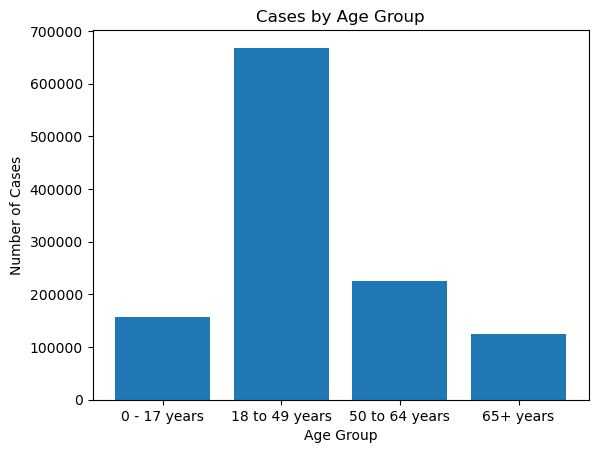

In [26]:
plt.bar(age_group_df["age_group"], age_group_df["cases"])
plt.xlabel("Age Group")
plt.ylabel("Number of Cases")
plt.title("Cases by Age Group")
plt.show()


Maximum age affected from covid 19 is in between 18years to 49years.


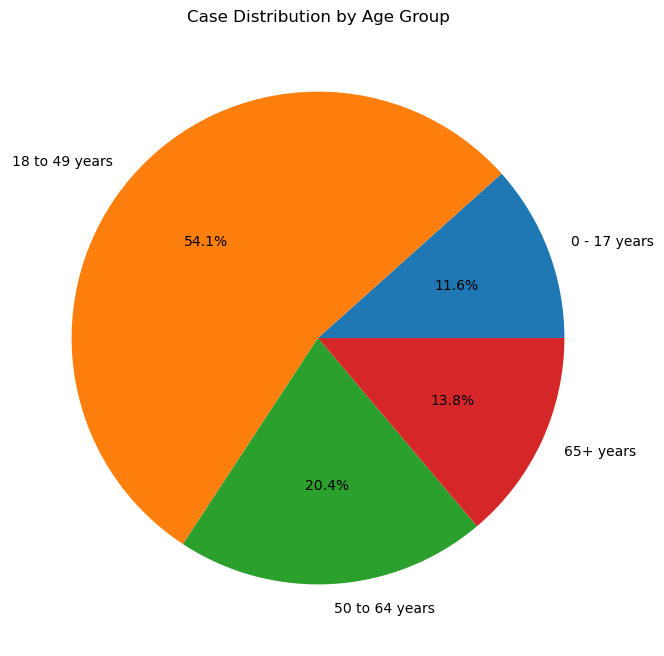

In [27]:
# Pie charts
age_group_df = age_group_df.groupby("age_group")["cases"].sum()
age_group_df.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.title("Case Distribution by Age Group")
plt.ylabel("")  # Remove y-axis label
plt.show()


Maximum affected people comes under the age of 18 to 49 years and less people affected from covid comes under 0-17years.

VACCINATION 

In [28]:
vaccination_df = pd.read_csv("../project1 covid19/us_state_vaccinations.csv")
vaccination_df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [29]:
vaccination_df = vaccination_df.dropna()
vaccination_df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
263,2021-10-02,Alabama,4544355.0,6738280.0,2586950.0,42.73,92.68,2094920.0,52.76,137.43,9583.0,10431.0,2127.0,0.674,2985.0,0.06
264,2021-10-03,Alabama,4565230.0,6736650.0,2592096.0,42.89,93.11,2103203.0,52.87,137.39,20875.0,11389.0,2323.0,0.678,10683.0,0.22
265,2021-10-04,Alabama,4579477.0,6736230.0,2595947.0,43.02,93.40,2109349.0,52.94,137.38,14247.0,12178.0,2484.0,0.680,14974.0,0.31
266,2021-10-05,Alabama,4584378.0,6742810.0,2597448.0,43.07,93.50,2111925.0,52.97,137.52,4901.0,10470.0,2135.0,0.680,15821.0,0.32
267,2021-10-06,Alabama,4594736.0,6757960.0,2600070.0,43.15,93.71,2115732.0,53.03,137.83,10358.0,11500.0,2345.0,0.680,19856.0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54295,2022-06-12,Wyoming,758185.0,1014285.0,338217.0,51.23,131.00,296500.0,58.44,175.25,45.0,325.0,562.0,0.748,150227.0,25.96
54296,2022-06-13,Wyoming,758188.0,1014285.0,338220.0,51.23,131.00,296500.0,58.44,175.25,3.0,325.0,562.0,0.748,150227.0,25.96
54297,2022-06-14,Wyoming,758784.0,1015885.0,338314.0,51.24,131.11,296557.0,58.46,175.53,596.0,307.0,530.0,0.747,150679.0,26.03
54298,2022-06-15,Wyoming,759047.0,1015985.0,338384.0,51.25,131.15,296603.0,58.47,175.55,263.0,307.0,530.0,0.747,150830.0,26.06


In [30]:
vaccination_df.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
       'total_boosters_per_hundred'],
      dtype='object')

In [31]:
vaccination_df1=vaccination_df.drop(["daily_vaccinations_raw", "daily_vaccinations","daily_vaccinations_per_million","share_doses_used","total_boosters","total_boosters_per_hundred"], axis=1)
vaccination_df1

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred
263,2021-10-02,Alabama,4544355.0,6738280.0,2586950.0,42.73,92.68,2094920.0,52.76,137.43
264,2021-10-03,Alabama,4565230.0,6736650.0,2592096.0,42.89,93.11,2103203.0,52.87,137.39
265,2021-10-04,Alabama,4579477.0,6736230.0,2595947.0,43.02,93.40,2109349.0,52.94,137.38
266,2021-10-05,Alabama,4584378.0,6742810.0,2597448.0,43.07,93.50,2111925.0,52.97,137.52
267,2021-10-06,Alabama,4594736.0,6757960.0,2600070.0,43.15,93.71,2115732.0,53.03,137.83
...,...,...,...,...,...,...,...,...,...,...
54295,2022-06-12,Wyoming,758185.0,1014285.0,338217.0,51.23,131.00,296500.0,58.44,175.25
54296,2022-06-13,Wyoming,758188.0,1014285.0,338220.0,51.23,131.00,296500.0,58.44,175.25
54297,2022-06-14,Wyoming,758784.0,1015885.0,338314.0,51.24,131.11,296557.0,58.46,175.53
54298,2022-06-15,Wyoming,759047.0,1015985.0,338384.0,51.25,131.15,296603.0,58.47,175.55


In [32]:
vaccination_df.rename(columns={"location": "state", "total_vaccinations": "total_vaccinations", "total_vaccinations_per_hundred": "total_vaccinations/100", "people_vaccinated": "people_vaccinated", "people_vaccinated_per_hundred": "people_vaccinated/100", "people_fully_vaccinated": "people_fully_vaccinated", "people_fully_vaccinated_per_hundred": "people_fully_vaccinated/100"}, inplace=True)

In [33]:
vaccination_df.head()

,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated/100,total_vaccinations/100,people_fully_vaccinated,people_vaccinated/100,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
263,2021-10-02,Alabama,4544355.0,6738280.0,2586950.0,42.73,92.68,2094920.0,52.76,137.43,9583.0,10431.0,2127.0,0.674,2985.0,0.06
264,2021-10-03,Alabama,4565230.0,6736650.0,2592096.0,42.89,93.11,2103203.0,52.87,137.39,20875.0,11389.0,2323.0,0.678,10683.0,0.22
265,2021-10-04,Alabama,4579477.0,6736230.0,2595947.0,43.02,93.40,2109349.0,52.94,137.38,14247.0,12178.0,2484.0,0.680,14974.0,0.31
266,2021-10-05,Alabama,4584378.0,6742810.0,2597448.0,43.07,93.50,2111925.0,52.97,137.52,4901.0,10470.0,2135.0,0.680,15821.0,0.32
267,2021-10-06,Alabama,4594736.0,6757960.0,2600070.0,43.15,93.71,2115732.0,53.03,137.83,10358.0,11500.0,2345.0,0.680,19856.0,0.40


In [34]:
# Monthly vaccinated according to date and states
monthly_vaccination_df = vaccination_df.groupby(["date", "state"]).sum()
monthly_vaccination_df = pd.DataFrame(monthly_vaccination_df)
monthly_vaccination_df.head(100)

# monthly_vaccination_df = vaccination_df.groupby("date")["total_vaccinations","state"].sum()
# monthly_vaccination_df = pd.DataFrame(monthly_vaccination_df)
# monthly_vaccination_df.head(100)
# # monthly_vaccination_df.plot(kind="line", figsize=(15, 10))
# # plt.xlabel("Date")
# # plt.ylabel("Total Vaccinations")
# # plt.title("Total Vaccinations Over Time"
# # plt.show()

total_vaccinations  total_distributed  \
date       state                                                  
2021-08-27 Alaska                   724964.0           927345.0   
           Arizona                 7508553.0          9281230.0   
           Arkansas                2759343.0          3679330.0   
           California             47626074.0         54679635.0   
           Colorado                6767648.0          7781995.0   
...                                      ...                ...   
2021-08-28 Virginia               10169860.0         11717005.0   
           West Virginia           1512635.0          2486265.0   
           Wisconsin               6438892.0          6937485.0   
           Wyoming                  473961.0           582275.0   
2021-08-29 Alaska                   726856.0           930085.0   

                          people_vaccinated  people_fully_vaccinated/100  \
date       state                                                           
2021-08-27 Alaska                  393512.0                        47.01   
           Arizona                4094831.0                        47.50   
           Arkansas               1591251.0                        40.84   
           California            27031190.0                        55.43   
           Colorado               3629716.0                        56.56   
...                                     ...                          ...   
2021-08-28 Virginia               5544291.0                        56.89   
           West Virginia           842448.0                        39.61   
           Wisconsin              3396977.0                        53.74   
           Wyoming                 259664.0                        38.36   
2021-08-29 Alaska                  394485.0                        47.09   

                          total_vaccinations/100  people_fully_vaccinated  \
date       state                                                            
2021-08-27 Alaska                          99.10                 343905.0   
           Arizona                        103.16                3457097.0   
           Arkansas                        91.44                1232385.0   
           California                     120.54               21902043.0   
           Colorado                       117.52                3256973.0   
...                                          ...                      ...   
2021-08-28 Virginia                       119.15                4856038.0   
           West Virginia                   84.40                 709914.0   
           Wisconsin                      110.59                3129076.0   
           Wyoming                         81.89                 222035.0   
2021-08-29 Alaska                          99.36                 344466.0   

                          people_vaccinated/100  distributed_per_hundred  \
date       state                                                           
2021-08-27 Alaska                         53.79                   126.77   
           Arizona                        56.26                   127.51   
           Arkansas                       52.73                   121.92   
           California                     68.41                   138.39   
           Colorado                       63.03                   135.13   
...                                         ...                      ...   
2021-08-28 Virginia                       64.96                   137.27   
           West Virginia                  47.01                   138.73   
           Wisconsin                      58.34                   119.15   
           Wyoming                        44.87                   100.61   
2021-08-29 Alaska                         53.92                   127.14   

                          daily_vaccinations_raw  daily_vaccinations  \
date       state                                                       
2021-08-27 Alaska             

In [35]:
monthly_vaccination_df.columns

Index(['total_vaccinations', 'total_distributed', 'people_vaccinated',
       'people_fully_vaccinated/100', 'total_vaccinations/100',
       'people_fully_vaccinated', 'people_vaccinated/100',
       'distributed_per_hundred', 'daily_vaccinations_raw',
       'daily_vaccinations', 'daily_vaccinations_per_million',
       'share_doses_used', 'total_boosters', 'total_boosters_per_hundred'],
      dtype='object')

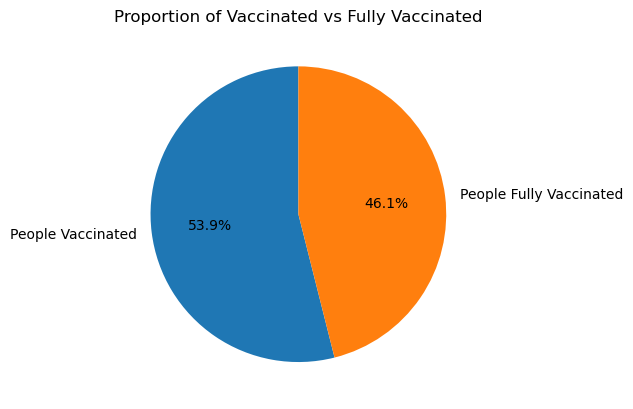

In [ ]:
labels = ["People Vaccinated", "People Fully Vaccinated"]
sizes = [
    monthly_vaccination_df["people_vaccinated"].sum(),
    monthly_vaccination_df["people_fully_vaccinated"].sum(),
]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Vaccinated vs Fully Vaccinated")
plt.show()



Unemployement

In [35]:
unemployement_df = pd.read_csv("../project1 covid19/bls_table.csv")
unemployement_df.head

<bound method NDFrame.head of          Date  Total  Men, 20 years and over  Women, 20 years and over  \
0    Jan 2015    5.7                     5.3                       5.0   
1    Feb 2015    5.5                     5.2                       4.9   
2    Mar 2015    5.4                     5.1                       4.9   
3    Apr 2015    5.4                     5.0                       5.0   
4    May 2015    5.6                     5.2                       5.1   
..        ...    ...                     ...                       ...   
115  Aug 2024    4.2                     3.9                       3.7   
116  Sep 2024    4.1                     3.8                       3.6   
117  Oct 2024    4.1                     3.9                       3.6   
118  Nov 2024    4.2                     3.9                       3.9   
119  Dec 2024    4.1                     3.7                       3.8   

     16 to 19 years old  White  Black or African American  Asian  \
0            

In [36]:
unemployement_df.columns

Index(['Date', 'Total', 'Men, 20 years and over', 'Women, 20 years and over',
       '16 to 19 years old', 'White', 'Black or African American', 'Asian',
       'Hispanic or Latino', 'Unnamed: 9'],
      dtype='object')

In [39]:
unemployement_df = unemployement_df.dropna()
unemployement_df

Date  \
Men, 20 years and over Women, 20 years and over                                             
3.2                    3.1                                                       Jan 2023   
                       3.2                                                       Dec 2022   
                       3.3                                       Nov 2019Dec 2019Jan 2020   
3.3                    3.1                       Sep 2019Feb 2020Jul 2022Sep 2022Apr 2023   
                       3.3                               May 2019Jun 2019Nov 2022Feb 2023   
...                                                                                   ...   
7.9                    8.3                                                       Aug 2020   
9.4                    10.5                                                      Jul 2020   
10.1                   11.2                                                      Jun 2020   
11.5                   13.9                                                      May 2020   
13.0                   15.5                                                      Apr 2020   

                                                 Total  16 to 19 years old  \
Men, 20 years and over Women, 20 years and over                              
3.2                    3.1                         3.5                10.4   
                       3.2                         3.5                10.5   
                       3.3                        10.8                37.1   
3.3                    3.1                        17.4                55.5   
                       3.3                        14.4                47.9   
...                                                ...                 ...   
7.9                    8.3                         8.4                16.5   
9.4                    10.5                       10.2                19.2   
10.1                   11.2                       11.0                22.5   
11.5                   13.9                       13.2                30.5   
13.0                   15.5                       14.8                32.8   

                                                 White  \
Men, 20 years and over Women, 20 years and over          
3.2                    3.1                         3.1   
                       3.2                         3.1   
                       3.3                         9.5   
3.3                    3.1                        15.4   
                       3.3                        13.0   
...                                                ...   
7.9                    8.3                         7.3   
9.4                    10.5                        9.2   
10.1                   11.2                       10.0   
11.5                   13.9                       12.3   
13.0                   15.5                       14.2   

                                                 Black or African American  \
Men, 20 years and over Women, 20 years and over                              
3.2                    3.1                                             5.4   
                       3.2                                             5.7   
                       3.3                                            17.9   
3.3                    3.1                                            27.9   
                       3.3                                            23.3   
...                                                                    ...   
7.9                    8.3                                            12.8   
9.4                    10.5                                           14.3   
10.1                   11.2                                           15.3   
11.5                   13.9                                           16.8   
13.0                   15.5                                           16.9   

                                                 Asian  Hispanic or Latino  \
Men, 20 year

In [40]:
unemployement_df = unemployement_df.groupby(["Men, 20 years and over", "Women, 20 years and over"]).sum()
unemployement_df = pd.DataFrame(unemployement_df)
unemployement_df.head(100)

Date  \
Men, 20 years and over Women, 20 years and over                                             
3.2                    3.1                                                       Jan 2023   
                       3.2                                                       Dec 2022   
                       3.3                                       Nov 2019Dec 2019Jan 2020   
3.3                    3.1                       Sep 2019Feb 2020Jul 2022Sep 2022Apr 2023   
                       3.3                               May 2019Jun 2019Nov 2022Feb 2023   
...                                                                                   ...   
7.9                    8.3                                                       Aug 2020   
9.4                    10.5                                                      Jul 2020   
10.1                   11.2                                                      Jun 2020   
11.5                   13.9                                                      May 2020   
13.0                   15.5                                                      Apr 2020   

                                                 Total  16 to 19 years old  \
Men, 20 years and over Women, 20 years and over                              
3.2                    3.1                         3.5                10.4   
                       3.2                         3.5                10.5   
                       3.3                        10.8                37.1   
3.3                    3.1                        17.4                55.5   
                       3.3                        14.4                47.9   
...                                                ...                 ...   
7.9                    8.3                         8.4                16.5   
9.4                    10.5                       10.2                19.2   
10.1                   11.2                       11.0                22.5   
11.5                   13.9                       13.2                30.5   
13.0                   15.5                       14.8                32.8   

                                                 White  \
Men, 20 years and over Women, 20 years and over          
3.2                    3.1                         3.1   
                       3.2                         3.1   
                       3.3                         9.5   
3.3                    3.1                        15.4   
                       3.3                        13.0   
...                                                ...   
7.9                    8.3                         7.3   
9.4                    10.5                        9.2   
10.1                   11.2                       10.0   
11.5                   13.9                       12.3   
13.0                   15.5                       14.2   

                                                 Black or African American  \
Men, 20 years and over Women, 20 years and over                              
3.2                    3.1                                             5.4   
                       3.2                                             5.7   
                       3.3                                            17.9   
3.3                    3.1                                            27.9   
                       3.3                                            23.3   
...                                                                    ...   
7.9                    8.3                                            12.8   
9.4                    10.5                                           14.3   
10.1                   11.2                                           15.3   
11.5                   13.9                                           16.8   
13.0                   15.5                                           16.9   

                                                 Asian  Hispanic or Latino  \
Men, 20 year

In [69]:
unemployement_df= unemployement_df.rename(columns={"Men, 20 years and over": "Male", "Women, 20 years and over": "Female"})
unemployement_df.head()

,White,Black or African American,Asian,Hispanic or Latino
Date,,,,
Apr 2015,4.7,9.7,4.4,6.8
Apr 2017May 2017,7.6,15.4,6.9,10.4
Apr 2019Aug 2019Oct 2019Aug 2022,12.9,23.9,10.7,16.9
Apr 2020,14.2,16.9,14.5,18.9
Apr 2021,5.3,10.2,5.8,7.9


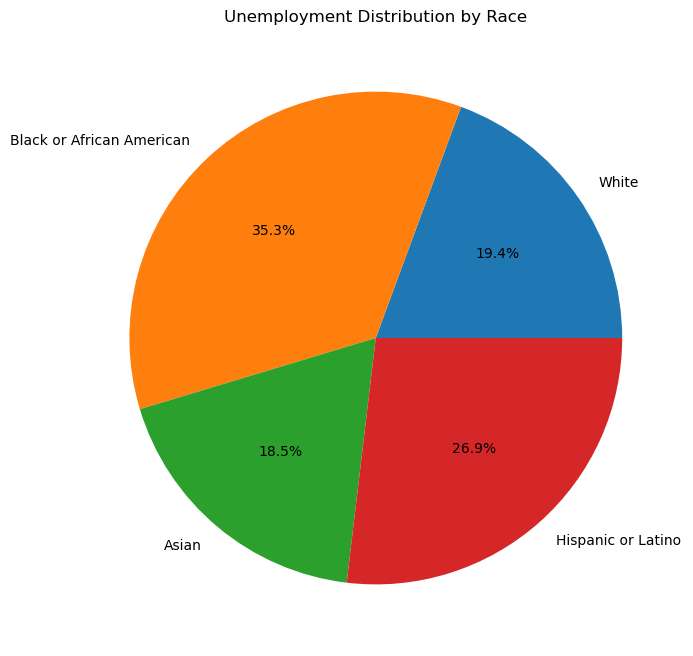

In [58]:
# Ensure proper column selection
unemployement_df = unemployement_df.groupby("Date")[["White", "Black or African American", "Asian", "Hispanic or Latino"]].sum()

# Plot the distribution of total cases across racial groups
unemployement_df.sum().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.title("Unemployment Distribution by Race")
plt.show()


Maximum unemployement rate occur in Black or African American during covid19  and Minimum in Asians
